In [5]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('floats.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [7]:
# Let's set up a problem: Can we predict 'callSign' using these three features:  'Depth', 'Temperature', 'Salinity' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Depth', 'Temperature', 'Salinity' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features

y_name = 'callSign'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [8]:
# Split data into training and testing datasets

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS FOR LR
Accuracy: 0.3157107231920199


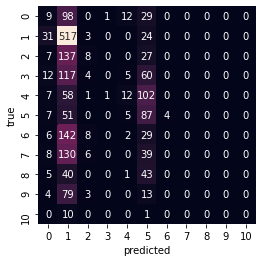

C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.09      0.06      0.07       149
    Q4901044       0.37      0.90      0.53       575
    Q4901265       0.24      0.04      0.08       179
    Q4901266       0.00      0.00      0.00       198
    Q4901267       0.32      0.07      0.11       181
    Q4901268       0.19      0.56      0.29       154
    Q4901269       0.00      0.00      0.00       187
    Q4901270       0.00      0.00      0.00       183
    Q4901271       0.00      0.00      0.00        89
    Q4901272       0.00      0.00      0.00        99
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.32      2005
   macro avg       0.11      0.15      0.10      2005
weighted avg       0.18      0.32      0.20      2005

Cohen Kappa Score: 0.12088719811116955


RESULTS FOR KNN-distance
Accuracy: 0.45037406483790526


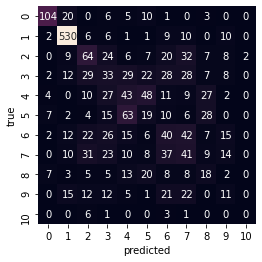


 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.81      0.70      0.75       149
    Q4901044       0.86      0.92      0.89       575
    Q4901265       0.34      0.36      0.35       179
    Q4901266       0.19      0.17      0.18       198
    Q4901267       0.23      0.24      0.23       181
    Q4901268       0.13      0.12      0.13       154
    Q4901269       0.21      0.21      0.21       187
    Q4901270       0.21      0.22      0.21       183
    Q4901271       0.17      0.20      0.18        89
    Q4901272       0.16      0.11      0.13        99
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.45      2005
   macro avg       0.30      0.30      0.30      2005
weighted avg       0.44      0.45      0.44      2005

Cohen Kappa Score: 0.35680047601498144


RESULTS FOR KNN-uniform
Accuracy: 0.4463840399002494


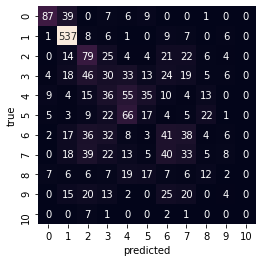


 clasification report:
               precision    recall  f1-score   support

    Q4901043       0.76      0.58      0.66       149
    Q4901044       0.80      0.93      0.86       575
    Q4901265       0.30      0.44      0.36       179
    Q4901266       0.15      0.15      0.15       198
    Q4901267       0.27      0.30      0.28       181
    Q4901268       0.17      0.11      0.13       154
    Q4901269       0.22      0.22      0.22       187
    Q4901270       0.21      0.18      0.20       183
    Q4901271       0.18      0.13      0.15        89
    Q4901272       0.11      0.04      0.06        99
    Q4901273       0.00      0.00      0.00        11

    accuracy                           0.45      2005
   macro avg       0.29      0.28      0.28      2005
weighted avg       0.42      0.45      0.43      2005

Cohen Kappa Score: 0.3462344478970403




C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Evaluate Some Classification Algorithms

# Now it is time to train some models on the data and estimate their accuracy on unseen data.

# Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-uniform', KNeighborsClassifier(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  